1. Domain
==========
Agriculture (Wheat)


2. Problem Statement
=====================
    A. Inputs
        -descriptions of wheat seeds with 7D measurement
         1. area A ---> 'area'
         2. perimeter P ---> 'perimeter' 
         3. compactness C = 4*pi*A/P^2 ---> 'compactness'
         4. length of kernel ---> 'kernel_length'
         5. width of kernel ---> 'kernel_width'
         6. asymmetry coefficient ---> 'asymmetry_coeff'
         7. length of kernel groove ---> 'kernel_groove_length'
         area perimeter compactness kernel_length kernel_width asymmetry_coeff kernel_groove_length
    B. Learning
        -We will train a classification and clustering model
    C. Outputs
        -to output and relate the species/label
        


3. Metric
==========
-We will use accuracy to assess performances including minizing MSE and correctly guess the number of clusters


4. Data Summary
================
-n:210, p:7
-3 different varieties (Kama,Rosa, and Canadian of wheat with 70 each -210 instances in total


5. Solution Proposal
====================
-Distribution Plot & PCA for Classification (Supervised Learning)
-kMeans for Clustering (Unsupervised Learning)



6. Benchmark Model
==================
-Guess all 'Kama'
-Guess 3 Clusters


7. Plan 
========
-Load the data
-Visualize the data
-Feature selection
-Train-Test Split
-Assess the model



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
pd.read_csv(SEEDS_DATA_URL)

,15.26 14.84 0.871 5.763 3.312 2.221 5.22 1
0,14.88\t14.57\t0.8811\t5.554\t3.333\t1.018\t4.9...
1,14.29\t14.09\t0.905\t5.291\t3.337\t2.699\t4.82...
2,13.84\t13.94\t0.8955\t5.324\t3.379\t2.259\t4.8...
3,16.14\t14.99\t0.9034\t5.658\t3.562\t1.355\t5.1...
4,14.38\t14.21\t0.8951\t5.386\t3.312\t2.462\t4.9...
5,14.69\t14.49\t0.8799\t5.563\t3.259\t3.586\t5.2...
6,14.11\t14.1\t0.8911\t5.42\t3.302\t2.7\t\t5\t\t1
7,16.63\t15.46\t0.8747\t6.053\t3.465\t2.04\t5.87...
8,16.44\t15.25\t0.888\t5.884\t3.505\t1.969\t5.53...
9,15.26\t14.85\t0.8696\t5.714\t3.242\t4.543\t5.3...


In [3]:
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
pd.read_csv(SEEDS_DATA_URL, sep="\s+", header=None)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


In [4]:
features_name = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target']

In [5]:
pd.read_csv(SEEDS_DATA_URL, sep="\s+", header=None, names= features_name)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


In [6]:
features_name = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target']

In [7]:
pd.read_csv('~/uclax-data-science/UCI-ML-Seeds/data/seeds_dataset.csv', sep="\s+", 
            header=None, names=features_name, nrows=210)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


In [8]:
wheat_seeds_df = pd.read_csv('~/uclax-data-science/UCI-ML-Seeds/data/seeds_dataset.csv', sep="\s+", 
            header=None, names=features_name, nrows=210)

In [9]:
wheat_seeds_df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [10]:
wheat_seeds_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<Figure size 3600x3600 with 0 Axes>

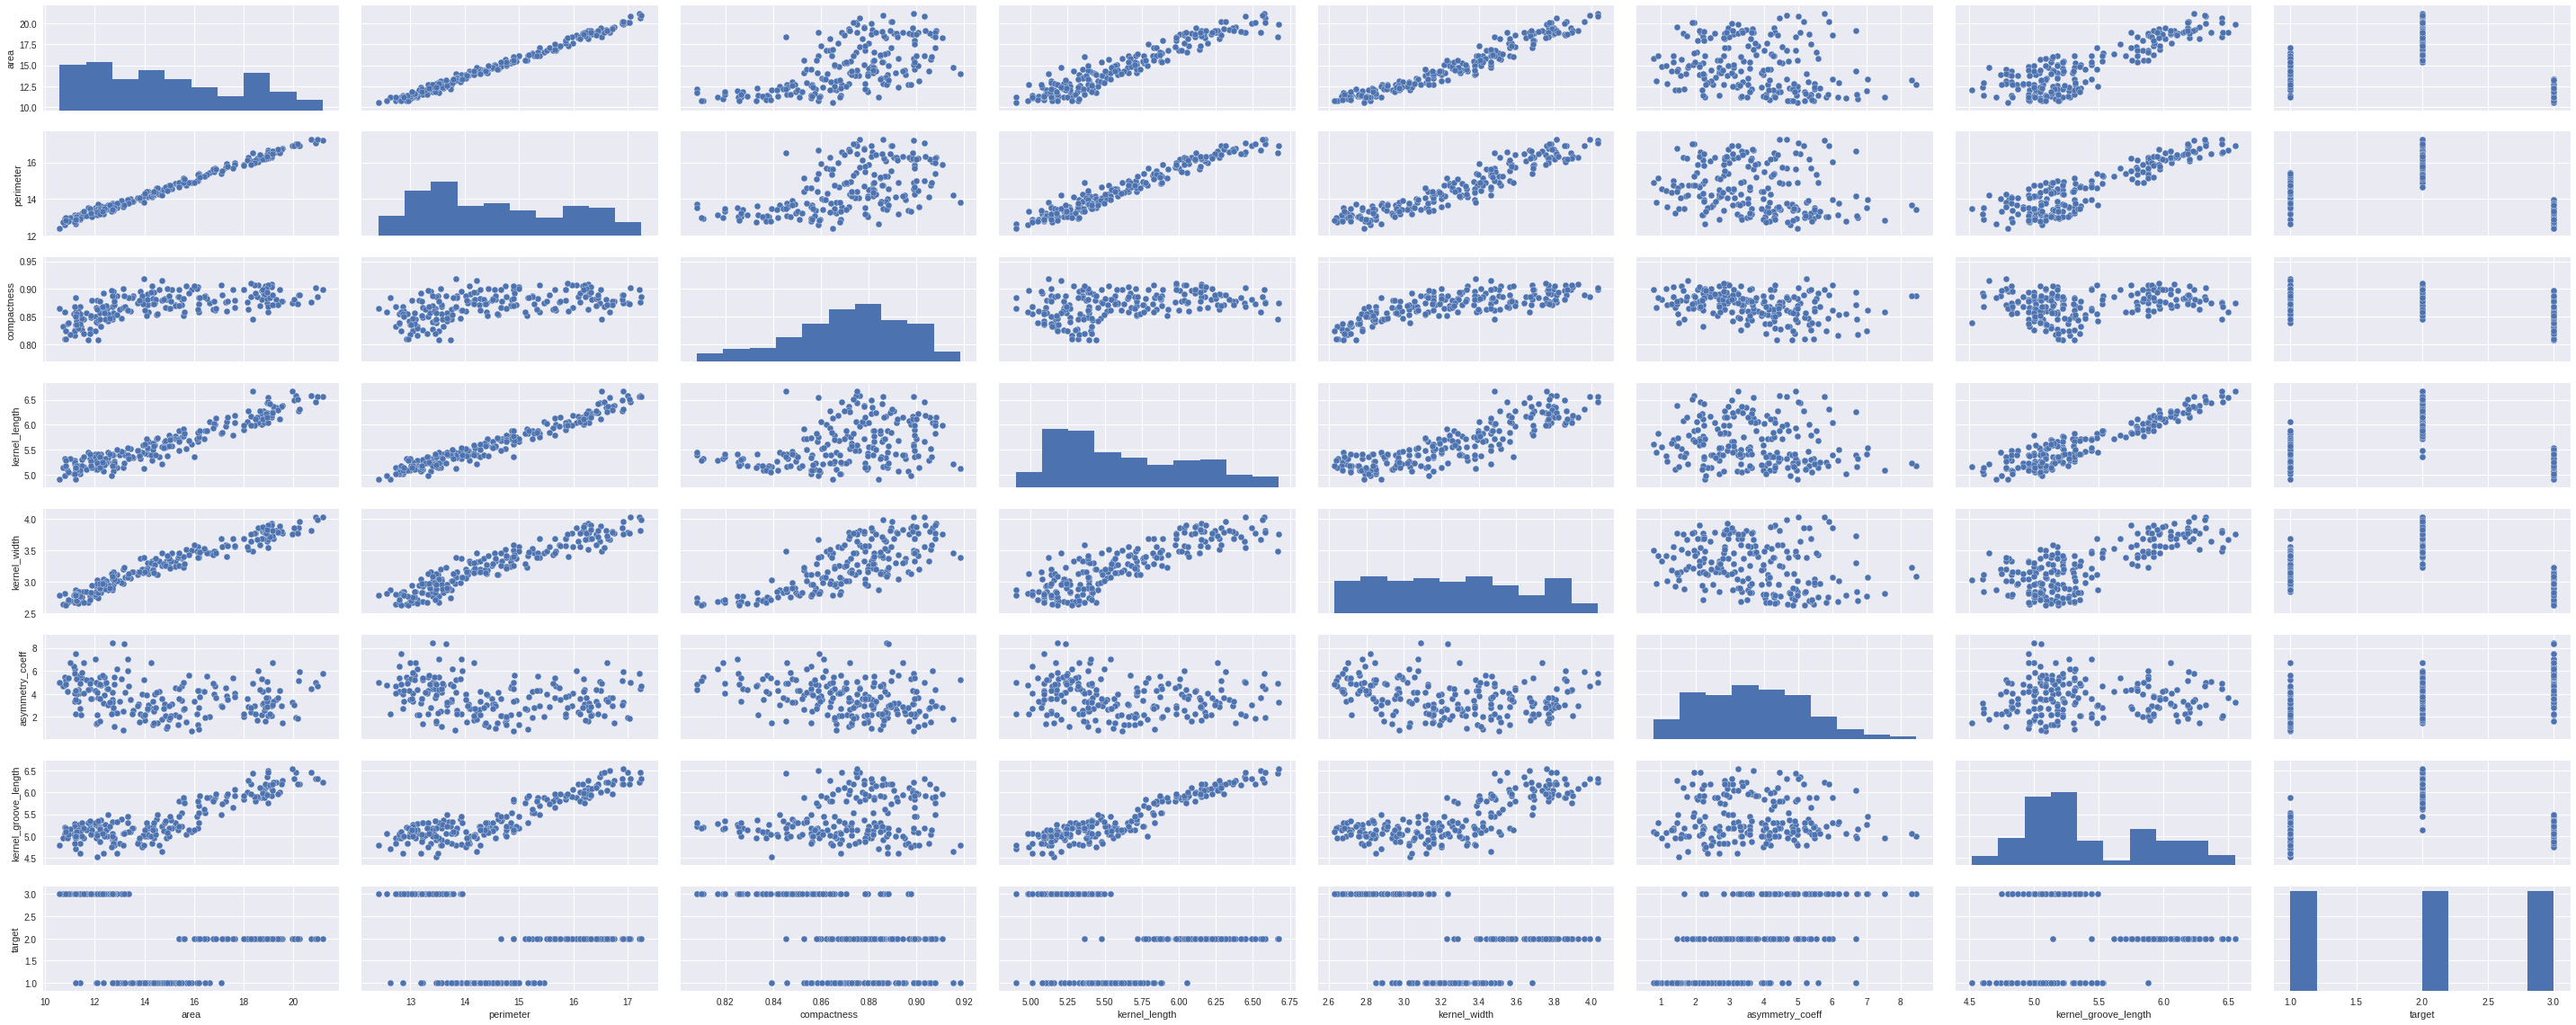

In [11]:
plt.figure(1, (50,50))


sns.pairplot(wheat_seeds_df, size=2, aspect=2.5)